# Machine Learning of US Census Data (Random Forest)

For the second part of this project I wanted to run some machine learning techniques on the data. In particular, I wanted to see if it were possible to predict values given other values of the US census tracts. In this project I attempted to predict the poverty rate given other variables in the dataset.

To do this I made use of a machine learning method known as Random Forest, this was done using the module scikit-learn.

In [1]:
#Initialisation Cell

#Import Modules
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
import matplotlib.pyplot as plt

#Get data from github
url='https://raw.githubusercontent.com/SamCouch/USCensusAnalysis/master/data/cen_tract.csv'

#Read the csv
f = pd.read_csv(url, error_bad_lines=False)

#Drop the rows with NaN's
f=f.dropna()

First I needed to select which variable I wanted to predict, and which variables I will use to predict them. For starters I thought it'd be interesting to predict the poverty rate. I decided to initially use the variables of gender ratio (Men), percentage citizens (Citizen), the average household income (Income) and the unemployment rate (Unemployment). 

To predict these values I utilised machine learning. Essentially, I would train a model on some of the census tract data, then validate it's effectiveness by testing it against the rest of the data available. To do this the function train_test_split is used, which randomly assigns 75% of the data into the train variables, and 25% to the validation data.

For this approach I am using Random Forest, as it is a very sophisticated algorithm that yields good results and does not suffer from issues like under/overfitting.

I then output the mean average error, which is the average error of the prediction.

In [2]:
#Decide values to train (y = predicted value, features = predicting values)
y=f.Poverty
features = ['Men','Citizen','Income','Unemployment']
x= f[features]

#Divide data into training and validation data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

#Define model
povpr_model = RandomForestRegressor(n_estimators=100,random_state=1)
#Fit model
povpr_model.fit(train_x, train_y)
#Calculate mean absolute error to verify results
povpr_predictions = povpr_model.predict(val_x)
povpr_mae = mean_absolute_error(povpr_predictions, val_y)

#Print the results
print("Random Forest MAE is: {}".format(povpr_mae))

Random Forest MAE is: 3.943139973600264


And done. The poverty rate was predicted for the census tracts with an average error as shown above. However, we have no context for how good of a guess for this is. So let's create an estimator that works by determining the average poverty rate, and simply guessing the average.

In [3]:
#Assign y
y=f.Poverty

#Find average
avg=y.mean()


#Create array of average at length of validation arrays

#Recreate val_x in case previous cell not run
y=f.Poverty
features = ['Men','Citizen','Income','Unemployment']
x= f[features]
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

#Create array of same length with all values the average
leng=len(val_x)
avgArr=avg*np.ones(leng)


#Estimate using average
povpr_av = mean_absolute_error(avgArr, val_y)

#Print the results
print("The Average is: {}".format(avg))
print("MAE of just taking Average: {}".format(povpr_av))

The Average is: 16.887968704882557
MAE of just taking Average: 10.002021529601123


This gives more context. It shows that the Random Forest method definitely performed better than taking the average, meaning it has some predictive properties, but it could be better, as it's only about two fifths the error of guessing by average.

To improve the results we can try simply adding more variables. Here I added all of them except the child poverty rates as that is obviously going to be too similar.

In [4]:
#Decide values to train (y = predicted value, features = predicting values)
y=f.Poverty
features = ['TotalPop','Men','Women','Hispanic','White','Black','Native','Asian','Pacific','Citizen',\
            'Income','IncomeErr','IncomePerCap','IncomePerCapErr','Professional','Service','Office',\
            'Construction','Production','Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome',\
            'MeanCommute','Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment']
x= f[features]

#Divide data into training and validation data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

#Define model
povpr_model = RandomForestRegressor(n_estimators=100,random_state=1)
#Fit model
povpr_model.fit(train_x, train_y)
#Calculate mean absolute error to verify results
povpr_predictions = povpr_model.predict(val_x)
povpr_mae = mean_absolute_error(povpr_predictions, val_y)

#Print the results
print("Random Forest MAE is: {}".format(povpr_mae))

Random Forest MAE is: 3.4118445715542847


This gives a better result, however, some of these variables probably don't really have an impact on the poverty rate, and so it'd be more efficient to not include them. Plus, it would actually be informative to see which variables do actually impact the poverty rate. To get an idea of this I checked to see what variables correlate with the poverty rate.

TotalPop          -0.151546
Men               -0.052300
Women              0.052300
Hispanic           0.350066
White             -0.529740
Black              0.411073
Native             0.086930
Asian             -0.123446
Pacific            0.008010
Citizen           -0.274246
Income            -0.703583
IncomeErr         -0.355854
IncomePerCap      -0.612775
IncomePerCapErr   -0.295631
Poverty            1.000000
ChildPoverty       0.898781
Professional      -0.549332
Service            0.592450
Office            -0.027952
Construction       0.171106
Production         0.331969
Drive             -0.306765
Carpool            0.268090
Transit            0.178450
Walk               0.285405
OtherTransp        0.211434
WorkAtHome        -0.251628
MeanCommute       -0.112523
Employed          -0.557642
PrivateWork        0.053666
PublicWork        -0.014308
SelfEmployed      -0.083983
FamilyWork        -0.018707
Unemployment       0.645123
Name: Poverty, dtype: float64


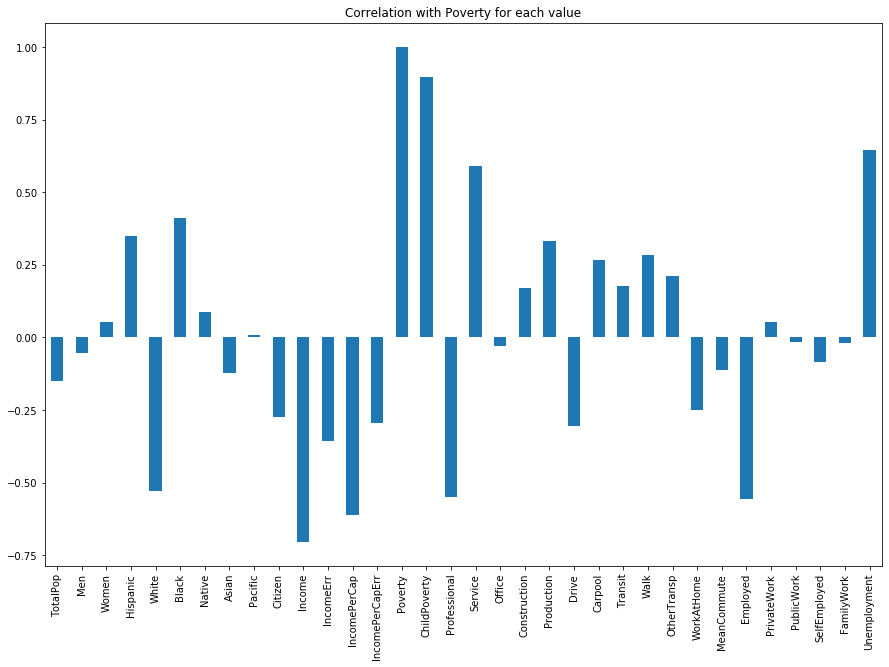

In [5]:
#Drop the labels
g=f.drop(columns=['ID','CensusTract','State','County'])

#Create Correlation Matrix
corrMatrix=g.corr()

#Create Array for just Poverty Correlation
corrPov=corrMatrix.Poverty


# #Print Poverty Correlation
print(corrPov)

#Plot on graph

ax = corrPov.plot.bar(figsize=(15,10),title='Correlation with Poverty for each value')

This lets us see which data points correlate with Poverty rate in the US. Some of these variables negatively correlate, which means as they get bigger the poverty rate gets smaller. 

This gives much more insight into what correlates poverty rates. Some of these are not surprising, such as higher unemployment correlating with with higher poverty, and census tracts with higher income will have on average lower poverty rates. There were some surprising results, though they make sense on consideration, such as the total population having more of an impact than the gender ratio or whether people worked in an office. One would think that the census tract population shouldn't matter, but since census tracts tend to be made with initially roughly equal populations, and don't change over time. Slightly larger census tracts will have had more people move to them, so would probably be better places to live, and so have lower poverty rates. It's a subtle effect, but it shows in the data.

While for uses such as analysing what affects poverty rates, the distinction between positive and negative correlation is important, for our purposes the correlation of a value being strong, regardless of direction, is important. So we we will again plot the correlation, this time taking the absolute values.

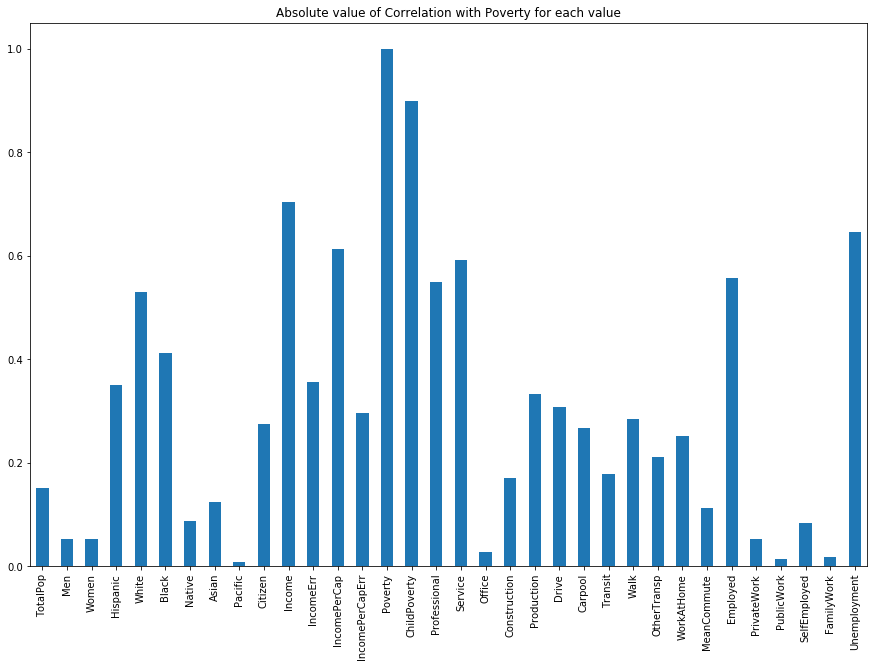

In [8]:
#Drop the labels
g=f.drop(columns=['ID','CensusTract','State','County'])

#Create Correlation Matrix
corrMatrix=g.corr()

#Create Array for just Poverty Correlation
corrPov=corrMatrix.Poverty

#Take Absolute Values
corrPovAbs=corrPov.abs()

#Plot on graph
ax = corrPovAbs.plot.bar(figsize=(15,10),title='Absolute value of Correlation with Poverty for each value')

From this we can see the variables that correlate the most strongly with the poverty rate, and are therefore are the most likely to be important for predicting the poverty rate for any given census tract. 

It should be noted that this is not neccisarily the case, as for example, the presence of multiple variables in conjunction with eachother might be more important for prediction of poverty than their correlation would suggest, but for the purpose of this project this will be good enough.

After reading from this chart I arbitrarily decided to drop any variable that had a correlation of less then 0.2, and tried again.

In [7]:
#Decide values to train (y = predicted value, features = predicting values)
y=f.Poverty
features = ['TotalPop','Hispanic','White','Black','Asian','Citizen','Income','IncomeErr',\
            'IncomePerCap','IncomePerCapErr','Professional','Service','Production','Drive',\
            'Carpool','Walk','OtherTransp','WorkAtHome','Employed','Unemployment']
x= f[features]

#Divide data into training and validation data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

#Define model
povpr_model = RandomForestRegressor(n_estimators=100,random_state=1)
#Fit model
povpr_model.fit(train_x, train_y)
#Calculate mean absolute error to verify results
povpr_predictions = povpr_model.predict(val_x)
povpr_mae = mean_absolute_error(povpr_predictions, val_y)

#Print the results
print("Random Forest MAE is: {}".format(povpr_mae))

Random Forest MAE is: 3.4180000549994505


This actually resulted in average error slightly less than before, while using less data. 

This concludes my project using US census data.